In [15]:
import os
import h5py
import torch
import pickle
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn as nn
import torchaudio
import torchaudio.transforms as audio_tr
from torchvision import datasets, transforms

In [8]:
data_path = './datasets/cifar_10/cifar-10-batches-py/data_batch_1'

In [9]:
with open(data_path, 'rb') as fo:
    dict = pickle.load(fo, encoding='bytes')
dict.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

In [10]:
dict[b'labels'][0]

6

In [11]:
img = transforms.ToPILImage()(dict[b'data'][0].reshape(3,32,32).transpose(1,2,0))
print(type(img))

<class 'PIL.Image.Image'>


In [12]:
dict[b'data'].shape

(10000, 3072)

In [16]:
CIFAR_10_LABELS = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

CIFAR_100_LABELS = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy',
                    'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 
                    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 
                    'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 
                    'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 
                    'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 
                    'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 
                    'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 
                    'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

ESC_50_LABELS = ['dog', 'rooster', 'pig', 'cow', 'frog', 'cat', 'hen', 'insects', 'sheep', 'crow', 'rain', 'sea_waves', 
                 'crackling_fire', 'crickets', 'chirping_birds', 'water_drops', 'wind', 'pouring_water', 'toilet_flush', 
                 'thunderstorm', 'crying_baby', 'sneezing', 'clapping', 'breathing', 'coughing', 'footsteps', 'laughing', 
                 'brushing_teeth', 'snoring', 'drinking_sipping',  'door_wood_knock', 'mouse_click', 'keyboard_typing', 
                 'door_wood_creaks', 'can_opening', 'washing_machine', 'vacuum_cleaner', 'clock_alarm', 'clock_tick', 
                 'glass_breaking', 'helicopter', 'chainsaw', 'siren', 'car_horn', 'engine', 'train', 'church_bells', 'airplane', 'fireworks', 'hand_saw']

CLUSTER_LABELS_TRAIN = {
                    'automobile' : {'cifar_labels' : ['automobile', 'truck', 'streetcar', 'bus', 'motorcycle', 'pickup_truck'],
                                    'cifar_data' : [],
                                    'esc_labels' : ['car_horn', 'engine'],
                                    'esc_data' : []},
                    'baby' : {'cifar_labels' : ['baby'],
                                    'cifar_data' : [],
                                    'esc_labels' : ['crying_baby'],
                                    'esc_data' : []},
                    'bird' : {'cifar_labels' : ['bird'],
                                    'cifar_data' : [],
                                    'esc_labels' : ['rooster', 'hen', 'crow', 'chirping_birds'],
                                    'esc_data' : []},
                    'cat' : {'cifar_labels' : ['cat'],
                                    'cifar_data' : [],
                                    'esc_labels' : ['cat'],
                                    'esc_data' : []},
                    'cattle' : {'cifar_labels' : ['cattle', 'horse'],
                                    'cifar_data' : [],
                                    'esc_labels' : ['pig', 'cow', 'sheep'],
                                    'esc_data' : []},
                    'clock' : {'cifar_labels' : ['clock'],
                                    'cifar_data' : [],
                                    'esc_labels' : ['clock_alarm', 'clock_tick'],
                                    'esc_data' : []},
                    'computer' : {'cifar_labels' : ['keyboard'],
                                    'cifar_data' : [],
                                    'esc_labels' : ['mouse_click', 'keyboard_typing'],
                                    'esc_data' : []},
                    'containers_can' : {'cifar_labels' : ['can'],
                                    'cifar_data' : [],
                                    'esc_labels' : ['can_opening'],
                                    'esc_data' : []},
                    'containers_glass' : {'cifar_labels' : ['bottle', 'bowl', 'cup', 'plate'],
                                    'cifar_data' : [],
                                    'esc_labels' : ['glass_breaking'],
                                    'esc_data' : []},
                    'dog' : {'cifar_labels' : ['dog'],
                                    'cifar_data' : [],
                                    'esc_labels' : ['dog'],
                                    'esc_data' : []},
                    'frog' : {'cifar_labels' : ['frog'],
                                    'cifar_data' : [],
                                    'esc_labels' : ['frog'],
                                    'esc_data' : []},
                    'furniture' : {'cifar_labels' : ['chair', 'table', 'wardrobe'],
                                    'cifar_data' : [],
                                    'esc_labels' : ['door_wood_creaks', 'door_wood_knock'],
                                    'esc_data' : []},
                    'human' : {'cifar_labels' : ['boy', 'girl', 'man', 'woman'],
                                    'cifar_data' : [],
                                    'esc_labels' : ['sneezing', 'clapping', 'breathing', 'coughing', 'footsteps', 'laughing', 
                                                    'brushing_teeth', 'snoring', 'drinking_sipping'],
                                    'esc_data' : []},
                    'insect' : {'cifar_labels' : ['bee', 'beetle','butterfly', 'cockroach'],
                                    'cifar_data' : [],
                                    'esc_labels' : ['insects', 'crickets'],
                                    'esc_data' : []},
                    'plane' : {'cifar_labels' : ['airplane'],
                                    'cifar_data' : [],
                                    'esc_labels' : ['airplane'],
                                    'esc_data' : []},
                    'sea' : {'cifar_labels' : ['sea'],
                                    'cifar_data' : [],
                                    'esc_labels' : ['sea_waves'],
                                    'esc_data' : []},
                    'train' : {'cifar_labels' : ['train'],
                                    'cifar_data' : [],
                                    'esc_labels' : ['train'],
                                    'esc_data' : []}
                 }
CLUSTER_LABELS_TEST = {
                    'automobile' : {'cifar_labels' : ['automobile', 'truck', 'streetcar', 'bus', 'motorcycle', 'pickup_truck'],
                                    'cifar_data' : [],
                                    'esc_labels' : ['car_horn', 'engine'],
                                    'esc_data' : []},
                    'baby' : {'cifar_labels' : ['baby'],
                                    'cifar_data' : [],
                                    'esc_labels' : ['crying_baby'],
                                    'esc_data' : []},
                    'bird' : {'cifar_labels' : ['bird'],
                                    'cifar_data' : [],
                                    'esc_labels' : ['rooster', 'hen', 'crow', 'chirping_birds'],
                                    'esc_data' : []},
                    'cat' : {'cifar_labels' : ['cat'],
                                    'cifar_data' : [],
                                    'esc_labels' : ['cat'],
                                    'esc_data' : []},
                    'cattle' : {'cifar_labels' : ['cattle', 'horse'],
                                    'cifar_data' : [],
                                    'esc_labels' : ['pig', 'cow', 'sheep'],
                                    'esc_data' : []},
                    'clock' : {'cifar_labels' : ['clock'],
                                    'cifar_data' : [],
                                    'esc_labels' : ['clock_alarm', 'clock_tick'],
                                    'esc_data' : []},
                    'computer' : {'cifar_labels' : ['keyboard'],
                                    'cifar_data' : [],
                                    'esc_labels' : ['mouse_click', 'keyboard_typing'],
                                    'esc_data' : []},
                    'containers_can' : {'cifar_labels' : ['can'],
                                    'cifar_data' : [],
                                    'esc_labels' : ['can_opening'],
                                    'esc_data' : []},
                    'containers_glass' : {'cifar_labels' : ['bottle', 'bowl', 'cup', 'plate'],
                                    'cifar_data' : [],
                                    'esc_labels' : ['glass_breaking'],
                                    'esc_data' : []},
                    'dog' : {'cifar_labels' : ['dog'],
                                    'cifar_data' : [],
                                    'esc_labels' : ['dog'],
                                    'esc_data' : []},
                    'frog' : {'cifar_labels' : ['frog'],
                                    'cifar_data' : [],
                                    'esc_labels' : ['frog'],
                                    'esc_data' : []},
                    'furniture' : {'cifar_labels' : ['chair', 'table', 'wardrobe'],
                                    'cifar_data' : [],
                                    'esc_labels' : ['door_wood_creaks', 'door_wood_knock'],
                                    'esc_data' : []},
                    'human' : {'cifar_labels' : ['boy', 'girl', 'man', 'woman'],
                                    'cifar_data' : [],
                                    'esc_labels' : ['sneezing', 'clapping', 'breathing', 'coughing', 'footsteps', 'laughing', 
                                                    'brushing_teeth', 'snoring', 'drinking_sipping'],
                                    'esc_data' : []},
                    'insect' : {'cifar_labels' : ['bee', 'beetle','butterfly', 'cockroach'],
                                    'cifar_data' : [],
                                    'esc_labels' : ['insects', 'crickets'],
                                    'esc_data' : []},
                    'plane' : {'cifar_labels' : ['airplane'],
                                    'cifar_data' : [],
                                    'esc_labels' : ['airplane'],
                                    'esc_data' : []},
                    'sea' : {'cifar_labels' : ['sea'],
                                    'cifar_data' : [],
                                    'esc_labels' : ['sea_waves'],
                                    'esc_data' : []},
                    'train' : {'cifar_labels' : ['train'],
                                    'cifar_data' : [],
                                    'esc_labels' : ['train'],
                                    'esc_data' : []}
                 }

In [17]:
print(CLUSTER_LABELS_TEST.values())

dict_values([{'cifar_labels': ['automobile', 'truck', 'streetcar', 'bus', 'motorcycle', 'pickup_truck'], 'cifar_data': [], 'esc_labels': ['car_horn', 'engine'], 'esc_data': []}, {'cifar_labels': ['baby'], 'cifar_data': [], 'esc_labels': ['crying_baby'], 'esc_data': []}, {'cifar_labels': ['bird'], 'cifar_data': [], 'esc_labels': ['rooster', 'hen', 'crow', 'chirping_birds'], 'esc_data': []}, {'cifar_labels': ['cat'], 'cifar_data': [], 'esc_labels': ['cat'], 'esc_data': []}, {'cifar_labels': ['cattle', 'horse'], 'cifar_data': [], 'esc_labels': ['pig', 'cow', 'sheep'], 'esc_data': []}, {'cifar_labels': ['clock'], 'cifar_data': [], 'esc_labels': ['clock_alarm', 'clock_tick'], 'esc_data': []}, {'cifar_labels': ['keyboard'], 'cifar_data': [], 'esc_labels': ['mouse_click', 'keyboard_typing'], 'esc_data': []}, {'cifar_labels': ['can'], 'cifar_data': [], 'esc_labels': ['can_opening'], 'esc_data': []}, {'cifar_labels': ['bottle', 'bowl', 'cup', 'plate'], 'cifar_data': [], 'esc_labels': ['glass_br

In [21]:
# CIFAR 10 files -> CLUSTER
cifar10_path = './datasets/cifar_10/cifar-10-batches-py/'
cifar10_paths = []
for path in os.listdir(cifar10_path):
    if '_batch' in path:
        cifar10_paths.append(os.path.join(cifar10_path, path))   

cifar100_path = './datasets/cifar-100-python/'
cifar100_paths = [cifar100_path+'test', cifar100_path+'train']

esc50_path = ['./datasets/ESC-50-master/audio/']

test_ratio = 0.2

def storeData(dirs : list, orig_labels : list, dataset_name : str, TEST_RATIO = test_ratio) -> dict:
    
    if dataset_name == 'CIFAR':
        for data_path in dirs:
            with open(data_path, 'rb') as file:
                batch_dict = pickle.load(file, encoding='bytes')
                #print(batch_dict.keys())
                batch_data = batch_dict[b'data']
                batch_idx  = None
                if 'batches' in data_path:
                    batch_idx  = batch_dict[b'labels']
                else:
                    batch_idx  = batch_dict[b'fine_labels']

                for image, label in zip(batch_data, batch_idx):
                    ind = random.random()
                    target_dict = CLUSTER_LABELS_TRAIN
                    if ind < 0.2 : 
                        target_dict = CLUSTER_LABELS_TEST
                        
                    label_name = orig_labels[label]               # label_name = 'train', 'cat', ... 
                    for prop_dict in target_dict.values():     # prop_dict = {cifar_labels : [...], ....}
                        #print(prop_dict)
                        if label_name in prop_dict['cifar_labels']:
                            prop_dict['cifar_data'].append(image)
                            
    elif dataset_name == "ESC":
        for data_path in os.listdir(dirs[0]):
            file_path = dirs[0]+data_path
            data_tensor, sr = torchaudio.load(file_path)
                        
            label_num  = int(data_path.split('-')[-1].split('.')[0])
            label_name = orig_labels[label_num]
            
            mel_spectrogram = nn.Sequential(
                AT.MelSpectrogram(sample_rate=sr, 
                                  n_fft=2048, 
                                  win_length=1102,
                                  hop_length=441,
                                  n_mels=224),
                AT.AmplitudeToDB()
            )
            data_tensor = mel_spectrogram(data_tensor)
            
            # Sampler
            ind = random.random()
            target_dict = CLUSTER_LABELS_TRAIN
            if ind < 0.2 : 
                target_dict = CLUSTER_LABELS_TEST
            
            #if label_name in ['car_horn', 'engine']:
            #    print(label_name, file_path)
            for prop_dict in target_dict.values():  
                if label_name in prop_dict['esc_labels']:
                    prop_dict['esc_data'].append(data_tensor.numpy())
                
        
    else:
        return ValueError
    
    return

In [22]:
storeData(dirs = cifar100_paths, orig_labels=CIFAR_100_LABELS, dataset_name='CIFAR')
storeData(dirs = cifar10_paths, orig_labels=CIFAR_10_LABELS, dataset_name='CIFAR')
storeData(dirs = esc50_path, orig_labels=ESC_50_LABELS, dataset_name='ESC')

In [23]:
for prop__dict, name in zip(CLUSTER_LABELS_TRAIN.values(), CLUSTER_LABELS_TRAIN.keys()):
    print("name : ", name, "\t \t NUM_CIFAR_IMG : ", len(prop__dict['cifar_data']), "\t NUM_ESC_AUDIO : ", len(prop__dict['esc_data']))
print('\n TEST DICT : ')
for prop__dict, name in zip(CLUSTER_LABELS_TEST.values(), CLUSTER_LABELS_TEST.keys()):
    print("name : ", name, "\t \t NUM_CIFAR_IMG : ", len(prop__dict['cifar_data']), "\t NUM_ESC_AUDIO : ", len(prop__dict['esc_data']))

name :  automobile 	 	 NUM_CIFAR_IMG :  22982 	 NUM_ESC_AUDIO :  66
name :  baby 	 	 NUM_CIFAR_IMG :  974 	 NUM_ESC_AUDIO :  35
name :  bird 	 	 NUM_CIFAR_IMG :  9548 	 NUM_ESC_AUDIO :  123
name :  cat 	 	 NUM_CIFAR_IMG :  9567 	 NUM_ESC_AUDIO :  33
name :  cattle 	 	 NUM_CIFAR_IMG :  10588 	 NUM_ESC_AUDIO :  94
name :  clock 	 	 NUM_CIFAR_IMG :  972 	 NUM_ESC_AUDIO :  65
name :  computer 	 	 NUM_CIFAR_IMG :  978 	 NUM_ESC_AUDIO :  62
name :  containers_can 	 	 NUM_CIFAR_IMG :  961 	 NUM_ESC_AUDIO :  29
name :  containers_glass 	 	 NUM_CIFAR_IMG :  3851 	 NUM_ESC_AUDIO :  35
name :  dog 	 	 NUM_CIFAR_IMG :  9616 	 NUM_ESC_AUDIO :  29
name :  frog 	 	 NUM_CIFAR_IMG :  9578 	 NUM_ESC_AUDIO :  34
name :  furniture 	 	 NUM_CIFAR_IMG :  2896 	 NUM_ESC_AUDIO :  63
name :  human 	 	 NUM_CIFAR_IMG :  3853 	 NUM_ESC_AUDIO :  294
name :  insect 	 	 NUM_CIFAR_IMG :  3829 	 NUM_ESC_AUDIO :  64
name :  plane 	 	 NUM_CIFAR_IMG :  9604 	 NUM_ESC_AUDIO :  34
name :  sea 	 	 NUM_CIFAR_IMG :  959 	 NUM_

In [25]:
#our_dataset = open("clustered_ESC_CIFAR_TEST.pkl", "wb")
#pickle.dump(CLUSTER_LABELS_TEST, our_dataset)
#our_dataset.close()

In [26]:
a_file = open("clustered_ESC_CIFAR.pkl", "rb")
output = pickle.load(a_file)
print(output.keys())
print(output['automobile']['esc_data'][0].shape)

dict_keys(['automobile', 'baby', 'bird', 'cat', 'cattle', 'clock', 'computer', 'containers_can', 'containers_glass', 'dog', 'frog', 'furniture', 'human', 'insect', 'plane', 'sea', 'train'])
(1, 224, 501)


[19, 29, 0, 11, 1, 86, 90, 28, 23, 31]


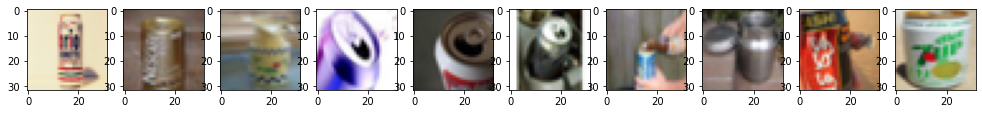

In [157]:
cifar_100_data_path = './datasets/cifar-100-python/train'
with open(cifar_100_data_path, 'rb') as fo:
    cifar_100 = pickle.load(fo, encoding='bytes')
print(cifar_100[b'fine_labels'][0:10])

fig, ax = plt.subplots(1, 10, figsize = (17, 5))
bowls = [573, 596, 699, 781, 928, 1252, 1300, 1414, 1743, 1753]

for i in range(10):
    ax[i].imshow(transforms.ToPILImage()(cifar_100[b'data'][bowls[i]].reshape(3,32,32).transpose(1,2,0)))
plt.show()

In [158]:
print([idx for idx, label in enumerate(cifar_100[b'fine_labels'][0:10000]) if label == 16])
cifar_100.keys()

[573, 596, 699, 781, 928, 1252, 1300, 1414, 1743, 1753, 1760, 1781, 1792, 1833, 1898, 1975, 2004, 2616, 2644, 2658, 2676, 2868, 2888, 2911, 2940, 2991, 3350, 3382, 3552, 3608, 3698, 3742, 3769, 3869, 3948, 4046, 4199, 4502, 4511, 4542, 4551, 4567, 4620, 4628, 4687, 4821, 4842, 4958, 4986, 5004, 5166, 5285, 5511, 5597, 5642, 5810, 5867, 5909, 6178, 6197, 6225, 6304, 6305, 6409, 6535, 6600, 6793, 6812, 6965, 6972, 7199, 7291, 7513, 7514, 7616, 7822, 7826, 7895, 7930, 8028, 8057, 8120, 8157, 8250, 8282, 8577, 8633, 8659, 8702, 8734, 8890, 8921, 8929, 9075, 9166, 9261, 9389, 9477, 9548, 9621, 9711, 9860, 9864]


dict_keys([b'filenames', b'batch_label', b'fine_labels', b'coarse_labels', b'data'])

In [159]:
ESC_meta_path = './datasets/ESC-50-master/meta/esc50.csv'
ESC_data = pd.read_csv(ESC_meta_path)
index = ESC_data['target'].values
category = ESC_data['category'].values

In [160]:
idx_sorted = []
cat_sorted = []

for idx, cat in zip(index, category):
    if idx not in idx_sorted:
        idx_sorted.append(idx)
        cat_sorted.append(cat)

In [161]:
sorted_names = [x for y, x in sorted(zip(idx_sorted, cat_sorted))]

In [162]:
print(idx_sorted, cat_sorted)
print(sorted_names)
print(sorted(idx_sorted))

[0, 14, 36, 19, 30, 34, 9, 22, 48, 41, 47, 31, 17, 45, 8, 15, 46, 37, 32, 16, 25, 4, 3, 27, 43, 12, 40, 29, 10, 7, 26, 6, 44, 23, 20, 49, 24, 39, 28, 18, 2, 35, 38, 21, 1, 11, 42, 5, 33, 13] ['dog', 'chirping_birds', 'vacuum_cleaner', 'thunderstorm', 'door_wood_knock', 'can_opening', 'crow', 'clapping', 'fireworks', 'chainsaw', 'airplane', 'mouse_click', 'pouring_water', 'train', 'sheep', 'water_drops', 'church_bells', 'clock_alarm', 'keyboard_typing', 'wind', 'footsteps', 'frog', 'cow', 'brushing_teeth', 'car_horn', 'crackling_fire', 'helicopter', 'drinking_sipping', 'rain', 'insects', 'laughing', 'hen', 'engine', 'breathing', 'crying_baby', 'hand_saw', 'coughing', 'glass_breaking', 'snoring', 'toilet_flush', 'pig', 'washing_machine', 'clock_tick', 'sneezing', 'rooster', 'sea_waves', 'siren', 'cat', 'door_wood_creaks', 'crickets']
['dog', 'rooster', 'pig', 'cow', 'frog', 'cat', 'hen', 'insects', 'sheep', 'crow', 'rain', 'sea_waves', 'crackling_fire', 'crickets', 'chirping_birds', 'wat

In [198]:
import random
import numpy as np

temp_list = {0 : np.array([1,2,3,4]), 1 : np.array([2,5,3,2]), 
             2 : np.array([6,3,5,1]), 3 : np.array([6,3,1,2])}
keys = list(temp_list.keys())
random.shuffle(keys)
print([(k, temp_list[k]) for k in keys])

vals = list(temp_list.values())
idxes = [0,1,2,3]

C = list(zip(idxes, vals))
random.shuffle(C)
print(C)

[(2, array([6, 3, 5, 1])), (0, array([1, 2, 3, 4])), (3, array([6, 3, 1, 2])), (1, array([2, 5, 3, 2]))]
[(1, array([2, 5, 3, 2])), (0, array([1, 2, 3, 4])), (2, array([6, 3, 5, 1])), (3, array([6, 3, 1, 2]))]


In [200]:
print((list(range(5)), [1,2,5,2]))

([0, 1, 2, 3, 4], [1, 2, 5, 2])


tensor([[ 0.0308,  0.0318,  0.0329,  ..., -0.1432, -0.1313, -0.1007]])
torch.Size([1, 220500])
44100 1103 441
spec :  torch.Size([1, 1025, 501]) 	 mel spec :  torch.Size([1, 224, 501])


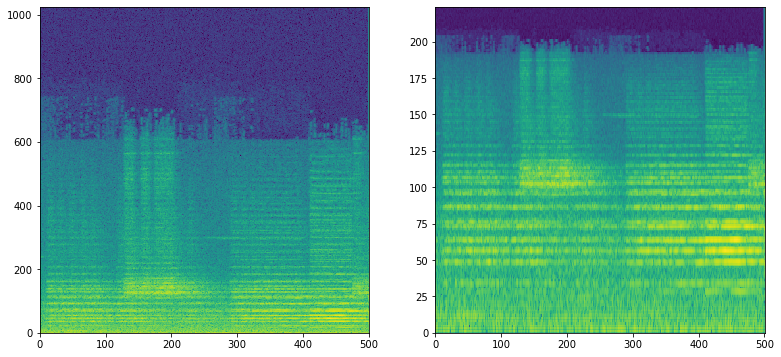

In [20]:
#signal = CLUSTER_LABELS['automobile']['esc_data'][5]
#print(sample_audio_data.shape)
#print(sample_audio_data)
signal, sr = torchaudio.load('C:/Users/Siryu_sci/2022-study/Meta/datasets/ESC-50-master/audio/1-24074-A-43.wav')
print(signal)
#print(signal.numpy())
#signal = torch.tensor(signal)
#print(torch.tensor(signal))
sr = int(len(signal[0])/5)
print(signal.shape)

import torchaudio
import torchaudio.transforms as AT
import matplotlib.pyplot as plt
import torch.nn as nn

n_fft = int(np.ceil(0.025*sr)) 
win_len = int(np.ceil(0.025*sr)) 
hop_len = int(np.ceil(0.01*sr)) 

print(sr, win_len, hop_len)

spectrogram = nn.Sequential(
                            AT.Spectrogram(
                            n_fft= 2048,
                            win_length = win_len,
                            hop_length = hop_len),
                            AT.AmplitudeToDB()
)
spec = spectrogram(signal)

mel_spectrogram = nn.Sequential(
    AT.MelSpectrogram(sample_rate=sr, 
                      n_fft=2048, 
                      win_length=1102,
                      hop_length=441,
                      n_mels=224),
    AT.AmplitudeToDB()
)
mel_spec = mel_spectrogram(signal)

print("spec : ", spec.shape, "\t mel spec : ", mel_spec.shape)

fig, ax = plt.subplots(1, 2, figsize = (13, 6))
ax[0].pcolor(spec[0])
ax[1].pcolor(mel_spec[0])
plt.show()

In [184]:
CLUSTER_LABELS['automobile']['esc_data'][5][0] == mel_spec[0].numpy()
#sum(CLUSTER_LABELS['automobile']['esc_data'][5][0] == 0.0)

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])